<a href="https://colab.research.google.com/github/ykato27/mplfinance/blob/main/styles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#  Mplfinance Styles

---

---

### mplfinance styles are used to customize:
- candle colors
- moving average colors
- background, grid, and figure colors
- grid style
- y-axis on the right or left
- matplotlib defaults
  
#### The simplest way to do this is to choose one of the `styles` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.

---

In [1]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [4]:
import pandas_datareader as pdr
symbols = ['SPY']
pdr = pdr.stooq.StooqDailyReader(symbols=symbols, start="2019-11-01", end="2019-11-29").read().sort_values(by='Date',ascending=True)
daily = pdr[['Open','High','Low','Close','Volume']]
columns_list = daily.columns.get_level_values(0)
daily.columns = columns_list
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

Attributes,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,297.85,299.10,297.68,299.05,72828746
2019-11-04,300.71,300.86,299.85,300.25,62044304
2019-11-05,300.47,300.78,299.60,299.92,43951447


Attributes,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,306.15,306.99,305.81,306.80,38622729
2019-11-27,307.31,308.18,307.08,308.18,45318679
2019-11-29,307.56,307.83,306.78,307.02,37460594


In [5]:
import mplfinance as mpf
mpf.__version__

'0.12.7a17'

---

#### Use `mpf.available_styles()` to see which mpf styles are currently installed:

---

In [6]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

---

- Use the `style=` kwarg to display the plot with one of the available styles.
- **Here are a few examples:**

---

In [7]:
# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(11,8),figscale=0.85)

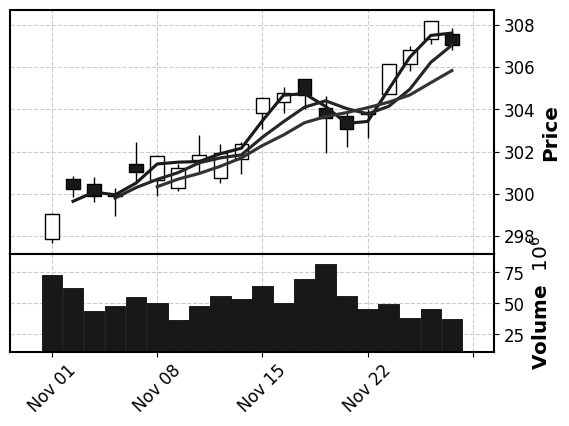

In [8]:
mpf.plot(daily,**kwargs,style='classic')

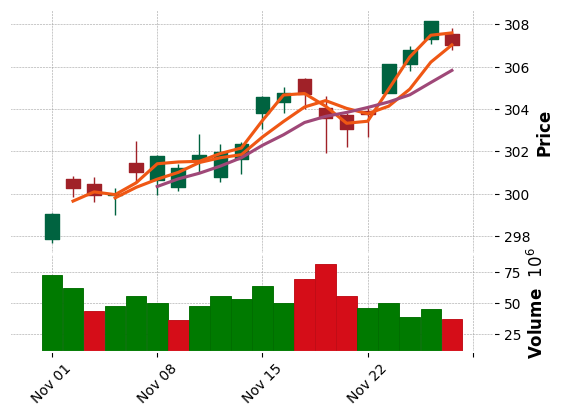

In [9]:
mpf.plot(daily,**kwargs,style='charles')

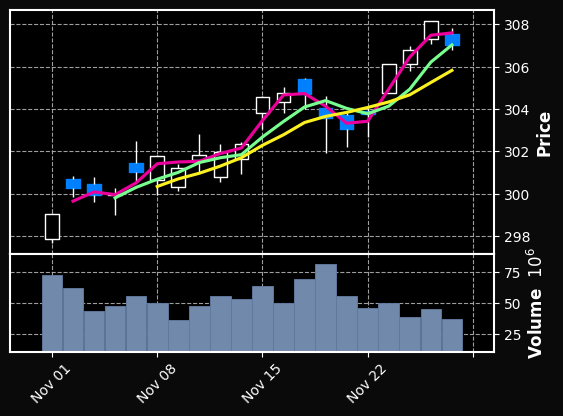

In [10]:
rcdf = mpf.plot(daily,**kwargs,style='mike')

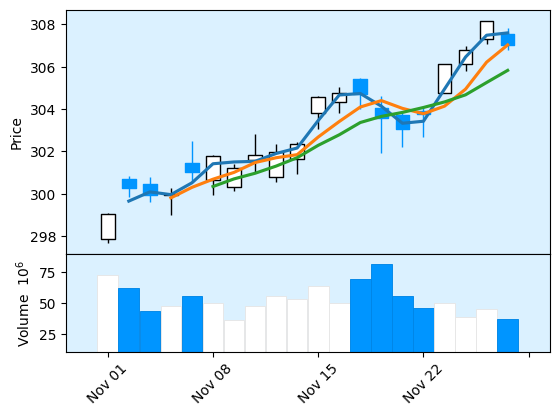

In [11]:
mpf.plot(daily,**kwargs,style='blueskies')

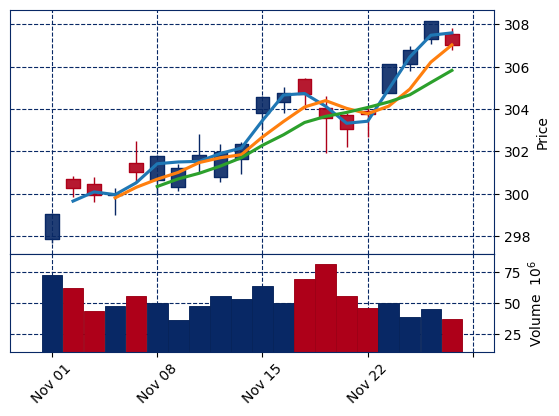

In [12]:
mpf.plot(daily,**kwargs,style='starsandstripes')

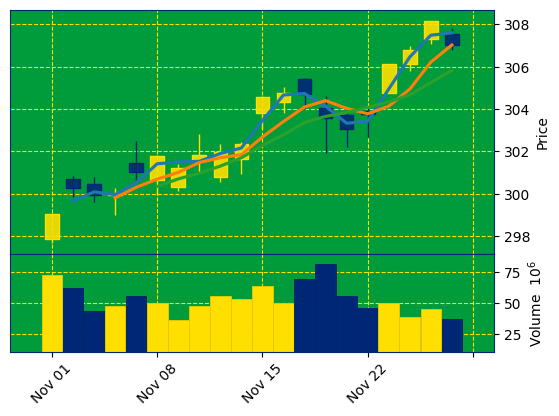

In [13]:
mpf.plot(daily,**kwargs,style='brasil')

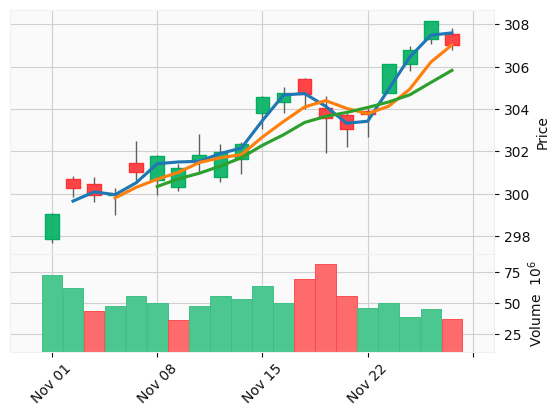

In [14]:
mpf.plot(daily,**kwargs,style='yahoo')

---
## -----------------------------------------------------------
## Customizing your own "mplfinance style"
## -----------------------------------------------------------

---

### Each `mplfinance` style is made up of **THREE** parts.<br><br>The first part is mandatory, the second two are optional:<br>

---

|     | Element | Optional/Mandatory | Description |
|:---:| :------------ | :----------------- | :---------- |
| **1.** | `marketcolors` | **mandatory** | controls the up/down colors of candlesticks, ohlc bars, and volume.|
| **2.** | `mavcolors` | optional | sets the colors of moving average lines.  If `mavcolors` is not specified, then the default `matplotlib` line colors are used (as specified by `rcParams['axes.prop_cycle']`) |
| **3.** | matplotlib style | optional | ([see matplotlib documentation](https://matplotlib.org/tutorials/introductory/customizing.html)) |

---

---
- Thus we can create a minimal **mplfinance style** by specifying only `marketcolors`:


- Any marketcolors not specified explicitly, will be taken from **mpf style** ` "default" `
  - notice in the _example below,_ we only specify colors `g` and `r` for the up and down candle colors.
  - other parts of `marketcolors` that were _not_ specified (i.e. volume, candle edges, candle wicks) take their colors from style "default"

In [15]:
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)

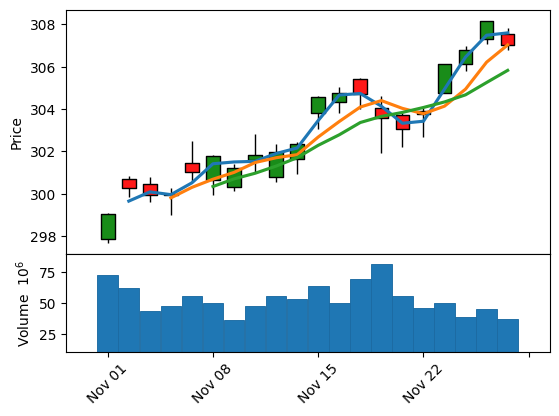

In [16]:
mpf.plot(daily,**kwargs,style=s)

---

- within `marketcolors` one can also specify colors for the `edges` and `wicks` of candlesticks.


- `ohlc` bars, and `volume` can also be specified separately from candlesticks:

for example:

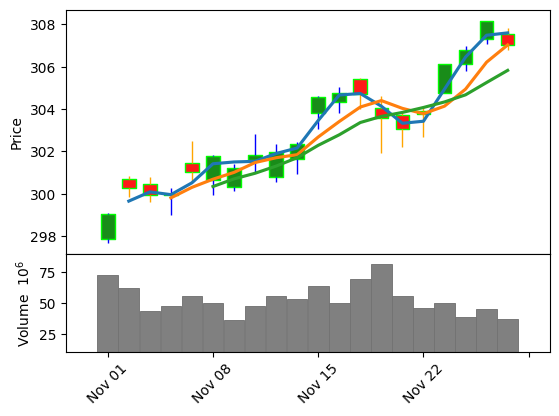

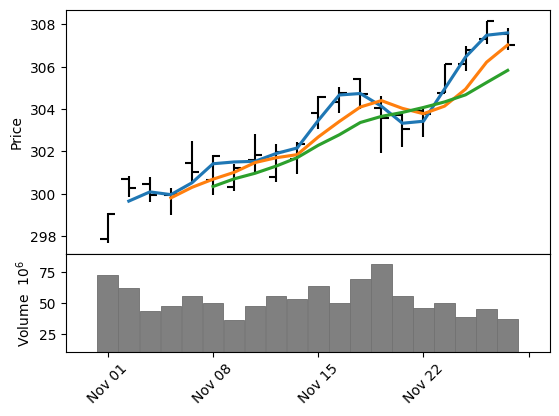

In [17]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(daily,**kwargs,style=s)

ohlckws = kwargs.copy()
ohlckws.update(type='ohlc')

mpf.plot(daily,**ohlckws,style=s)

---
---

- Each of the keywords `edge`, `wick`, `ohlc`, and `volume` can have the following values:<br>
  **1.** Any single matplotlib color<br>
  **2.** A dict specifying separate colors for `'up'` and a `'down'`<br>
  **3.** The str `'inherit'` (or any part thereof: `'i'`, `'in'`, `'inh'`, etc.) indicating that the keyword (`edge`, `wick`, `ohlc`, `volume`) should use the same colors as were specified by the keywords `up` and `down`.<br>

  
- Thus:

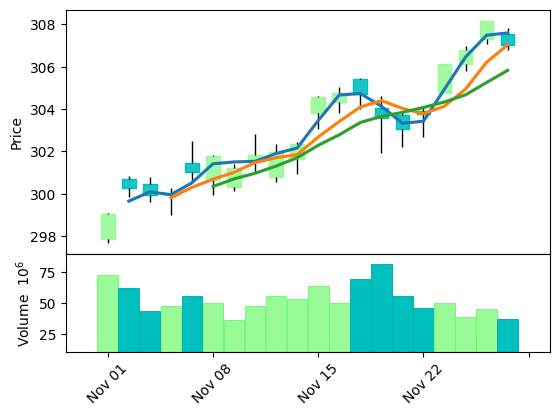

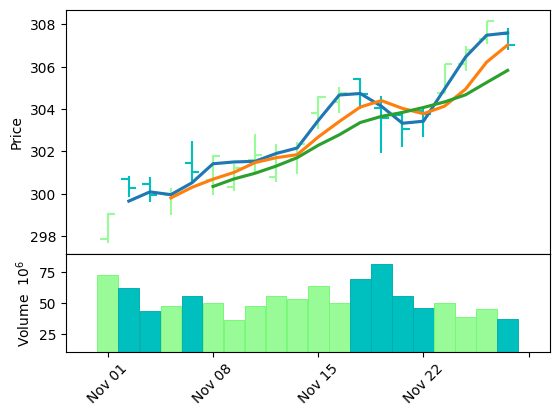

In [18]:
mc = mpf.make_marketcolors(up='palegreen',down='c',
                           edge='inherit',
                           wick='black',
                           volume='in',
                           ohlc='i')
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(daily,**kwargs,style=s)

mpf.plot(daily,**ohlckws,style=s)

---

- To save time, if you want **all** marketcolors to inherit from up/down, simply say `inherit=True`


- **Note that `inherit=True` will override all other specified colors**

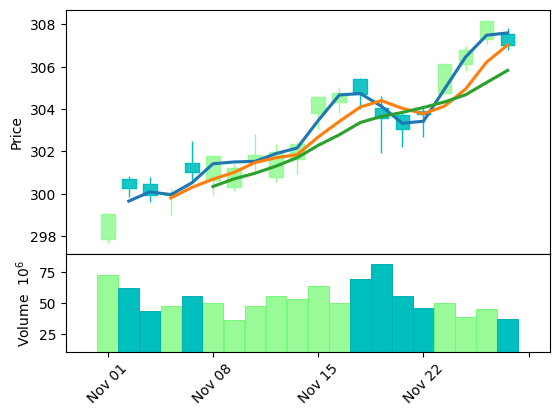

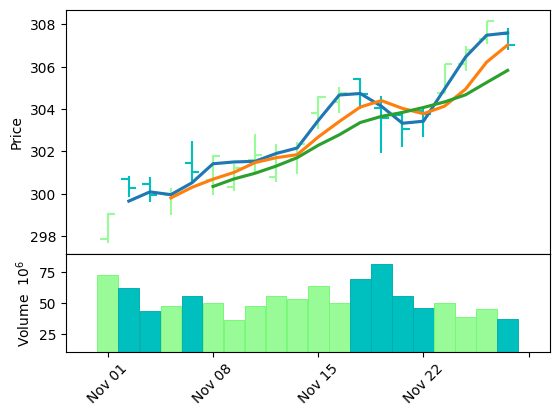

In [19]:
mc = mpf.make_marketcolors(up='palegreen',down='c',inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(daily,**kwargs,style=s)

mpf.plot(daily,**ohlckws,style=s)

---

## Using 'base' styles:

---

- There are two kinds of 'base' or foundation styles that can be specified:
  - `base_mpf_style` - base mplfinance style
  - `base_mpl_style` - [base matplotlib style](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html).
  

- Specifying a 'base' style can make it easier to create your own mpf style by giving you something to start with, on top of which you can specify your own changes.

---

## 'base' mplfinance styles:

---

- When creating either **marketcolors**, or an **mplfinance style**, it is possible to specify a **`base_mpf_style`**.

### marketcolors:
- When calling `mpf.make_marketcolors()`, specifying a `base_mpf_style` copies ***only*** the market colors from the 'base' style.

  - You can then make specific changes to any of `up`, `down`, `edge`, `wick`, `ohlc`, or `volume` on top of the `base_mpf_style` **marketcolors**.

### mplfinance style:
- But, when calling `mpf.make_mpf_style()`, specifying a `base_mpf_style` copies ***all*** of the style attributes from the `base_mpf_style` (marketcolors, background, grid, etc).



- For example, suppose I like style `nightclouds`, but I want to modify the `marketcolors` of that style to stand out more.  I can do the following:

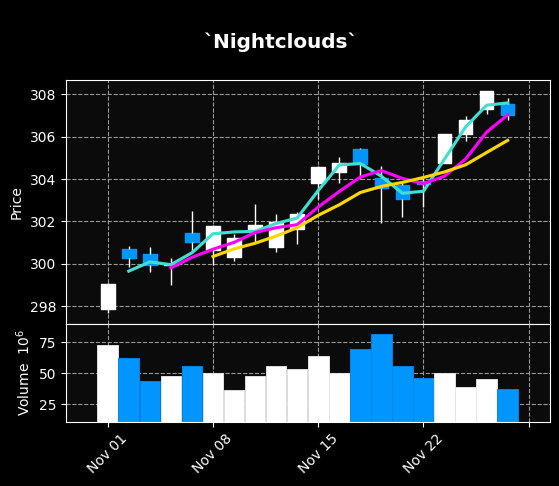

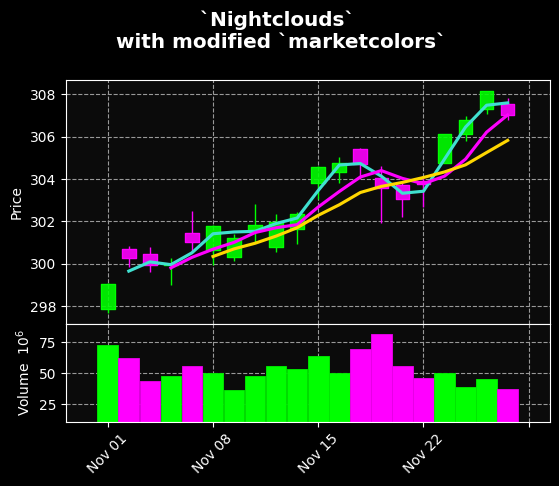

In [20]:
# This is what `nightclouds` looks like un-modified:
mpf.plot(daily,**kwargs,style='nightclouds',title='\n`Nightclouds`')

# Create my own `marketcolors` to use with the `nightclouds` style:
mc = mpf.make_marketcolors(up='#00ff00',down='#ff00ff',inherit=True)

# Create a new style based on `nightclouds` but with my own `marketcolors`:
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

# Plot my new custom mpf style:
mpf.plot(daily,**kwargs,style=s,title='`Nightclouds` \nwith modified `marketcolors`')

---
## matplotlib styles:

- **When creating a mpf style,** it is also possible to specify a **`base_mpl_style`** 
  - NOTICE **mpl** (matplot**lib**) style, _not_ mpf like we used above.  **See [matplotlib Style sheets reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html).**
  
  
- So for example, suppose I like the `marketcolors` from mpf style `nightclouds` but I want to put them on a plot with a style similar to matplotlib style `seaborn`:

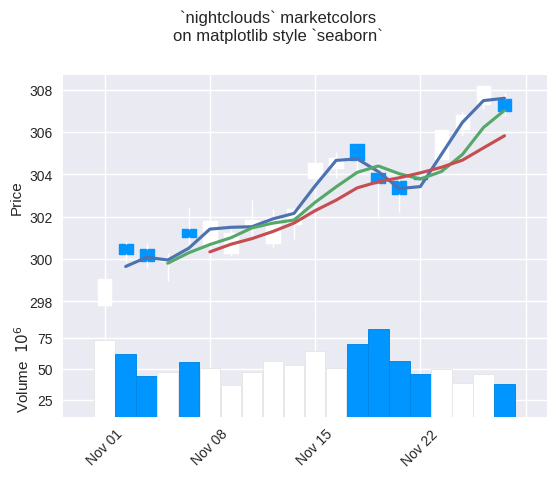

In [21]:
# Take marketcolors from 'nightclouds'
mc = mpf.make_marketcolors(base_mpf_style='nightclouds')

# Create a style based on `seaborn` using those market colors:
s  = mpf.make_mpf_style(base_mpl_style='seaborn',marketcolors=mc)

# Plot my new custom mpf style:
mpf.plot(daily,**kwargs,style=s,
         title='`nightclouds` marketcolors\non matplotlib style `seaborn`')

- Notice however, in the plot above, the white marketcolors are difficult to see with the light `seaborn` background.  


- **We can fix that by tweaking the market colors when we create them from `nightclouds`**

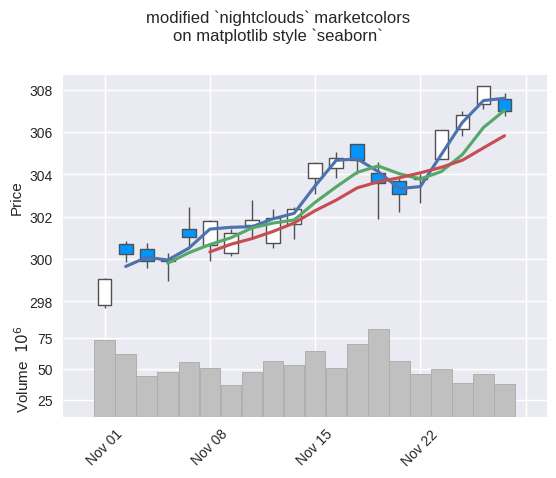

In [22]:
# Take marketcolors from 'nightclouds', but make them easier to see on a light background:
mc = mpf.make_marketcolors(base_mpf_style='nightclouds',
                           edge='#505050',wick='#505050',volume='silver')

# Create a style based on `seaborn` using those market colors:
s  = mpf.make_mpf_style(base_mpl_style='seaborn',marketcolors=mc)

# Plot my new custom mpf style:
mpf.plot(daily,**kwargs,style=s,
         title='modified `nightclouds` marketcolors\non matplotlib style `seaborn`')

---

### The following OPTIONAL keyword arguments are available to `mpf.make_mpf_style()`<br> for creating an **mplfinance style:**

| kwarg | comments    |
|:---- |:-------------- |
| base_mpf_style | `str` name of an existing **mplfinance** style.<br>*applied* ***first.***  (i.e. all other kwargs, if specified, override any settings in here). |
| base_mpl_style | `str` name of name an existing **matplotlib** style.<br>*applied* ***second.***  (i.e. all other kwargs, if specified, override any settings in here). |
| ...            | The remaining kwargs are applied only ***after*** the above two, and so will override any settings in the above two kwargs.
| marketcolors   | Output from `mpf.make_marketcolors()` |
| mavcolors      | `list` of one or more matplotlib colors to cycle through for moving averages |
| facecolor      | facecolor of the Axes
| edgecolor      | edgecolor of the Axes
| figcolor       | facecolor of the Figure (outside of the Axes)
| gridcolor      | color of grid lines
| gridstyle      | style of grid lines; possible values are:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'-' or 'solid',<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'--' or 'dashed',<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'-.' or 'dashdot',<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;':' or 'dotted',<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;None or ' ' or '' (draw nothing)
| gridaxis       | 'horizontal', 'vertical', or 'both'
| y_on_right     | boolean (display **primary** y-axis labels and ticks on right)  |
| rc             | `dict` of specific rcParams to modify. Note that the following kwargs also modify rcParams: facecolor, figcolor, gridcolor, gridstyle, gridaxis; If any of them are specified, and the same rcParam is also specified, then the kwarg takes precedence.


---

### WARNING:
- `mpf.make_marketcolors()` returns a `marketcolors` object, which can be used as input to the `marketcolors=` keyword argument of function `mpf.make_mpf_style()`


- `mpf.make_mpf_style()` returns an `mpf_style` object that is used as input the the `style=` keyword argument of function `mpf.plot()`


- You may have noticed that, at the present time, both the `marketcolors` object and the `mpf_style` object, are actually python `dict` objects, that are structured in a particular way that is expected and understood by the `mplfinance` code, **HOWEVER PLEASE NOTE:**
  - There is *no* guarantee that the structure of these dicts will not change in future versions of the code.
  - Nor is there any guarantee that these objects won't someday be an instance of some `class` that is specific to mplfinance.


- **THEREFORE** it is strongly advised that you always call `make_marketcolors()` and `make_mpf_style()` and **do not** do any direct manipulating of the output from these functions.

---